In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('C:/Users/CC/Documents/dice_com-job_us_sample.csv')
df1.head()

advertiserurl  \
0  https://www.dice.com/jobs/detail/AUTOMATION-TE...   
1  https://www.dice.com/jobs/detail/Information-S...   
2  https://www.dice.com/jobs/detail/Business-Solu...   
3  https://www.dice.com/jobs/detail/Java-Develope...   
4  https://www.dice.com/jobs/detail/DevOps-Engine...   

                             company  \
0  Digital Intelligence Systems, LLC   
1  University of Chicago/IT Services   
2               Galaxy Systems, Inc.   
3                      TransTech LLC   
4                   Matrix Resources   

                            employmenttype_jobstatus  \
0  C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...   
1                                          Full Time   
2                                          Full Time   
3                                          Full Time   
4                                          Full Time   

                                      jobdescription               jobid  \
0  Looking for Selenium engineers...must have sol...  Dice Id : 10110693   
1  The University of Chicago has a rapidly growin...  Dice Id : 10114469   
2  GalaxE.SolutionsEvery day, our solutions affec...  Dice Id : CXGALXYS   
3  Java DeveloperFull-time/direct-hireBolingbrook...  Dice Id : 10113627   
4  Midtown based high tech firm has an immediate ...  Dice Id : matrixga   

  joblocation_address                                           jobtitle  \
0         Atlanta, GA                           AUTOMATION TEST ENGINEER   
1         Chicago, IL                      Information Security Engineer   
2      Schaumburg, IL                       Business Solutions Architect   
3     Bolingbrook, IL  Java Developer (mid level)- FT- GREAT culture,...   
4         Atlanta, GA                                    DevOps Engineer   

         postdate                                            shift site_name  \
0      1 hour ago  Telecommuting not available|Travel not required       NaN   
1      1 week ago  Telecommuting not available|Travel not required       NaN   
2     2 weeks ago  Telecommuting not available|Travel not required       NaN   
3     2 weeks ago  Telecommuting not available|Travel not required       NaN   
4  48 minutes ago  Telecommuting not available|Travel not required       NaN   

                                              skills  \
0                                          SEE BELOW   
1  linux/unix, network monitoring, incident respo...   
2  Enterprise Solutions Architecture, business in...   
3                         Please see job description   
4  Configuration Management, Developer, Linux, Ma...   

                            uniq_id  
0  418ff92580b270ef4e7c14f0ddfc36b4  
1  8aec88cba08d53da65ab99cf20f6f9d9  
2  46baa1f69ac07779274bcd90b85d9a72  
3  3941b2f206ae0f900c4fba4ac0b18719  
4  45efa1f6bc65acc32bbbb953a1ed13b7

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             22000 non-null  object
 1   company                   21950 non-null  object
 2   employmenttype_jobstatus  21770 non-null  object
 3   jobdescription            22000 non-null  object
 4   jobid                     22000 non-null  object
 5   joblocation_address       21997 non-null  object
 6   jobtitle                  22000 non-null  object
 7   postdate                  22000 non-null  object
 8   shift                     21643 non-null  object
 9   site_name                 3490 non-null   object
 10  skills                    21957 non-null  object
 11  uniq_id                   22000 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [4]:
df1=df1.dropna()

In [5]:
df1.shape

(3417, 12)

In [6]:
df1['jobdescription'].head()

96     Responsible for managing one or more highly co...
97     Job Description: Seeking a Business Process An...
98     TAD PGS, INC. is currently seeking a DHMSM Ope...
99     Our client, one of the world's leading profess...
100    Our client, one of the largest banking and fin...
Name: jobdescription, dtype: object

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tdif=TfidfVectorizer(stop_words='english')
df1['jobdescription'] = df1['jobdescription'].fillna('')
tdif_matrix = tdif.fit_transform(df1['jobdescription'])
tdif_matrix.shape


(3417, 34094)

In [9]:

from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tdif_matrix, tdif_matrix)
indices = pd.Series(df1.index, index=df1['jobtitle']).drop_duplicates()

In [25]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda X:X[1], reverse=True)
    sim_scores = sim_scores[1:5]
    tech_indices = [i[0] for i in sim_scores]
    return df1['jobtitle'].iloc[tech_indices]

In [26]:
def get_user_query():
    user_query = input("Enter your choice: ")
    return user_query

# Get user query
user_query = get_user_query()
recommendations = get_recommendations(user_query)
print(recommendations)

Enter your choice: Data Engineer
1054     Software Technical Support Specialist (desktop...
1474                           Technical Support LONG-TERM
412                           Technical Support Specialist
15714                                         Service Desk
Name: jobtitle, dtype: object


In [27]:
get_recommendations("Data Engineer")

1054     Software Technical Support Specialist (desktop...
1474                           Technical Support LONG-TERM
412                           Technical Support Specialist
15714                                         Service Desk
Name: jobtitle, dtype: object

In [ ]:
#Lead DevOps Engineer
#Web Designer/Developer
#Senior Python Developer
#Data Engineer

In [12]:

#CLEANING OF DATA REMOVE UNCESSARY COLUMNS

df1.drop('employmenttype_jobstatus',inplace=True, axis=1)

df1.drop('shift',inplace=True, axis=1)

df1.drop('site_name',inplace=True, axis=1)

df1.drop('jobid',inplace=True, axis=1)

df1.drop('uniq_id',inplace=True, axis=1)

df1.head()


advertiserurl  \
96   https://www.dice.com/jobs/detail/%2528US%2529%...   
97   https://www.dice.com/jobs/detail/Business-Anal...   
98   https://www.dice.com/jobs/detail/DHMSM-Operati...   
99   https://www.dice.com/jobs/detail/Information-T...   
100  https://www.dice.com/jobs/detail/SWIFT-Messagi...   

                       company  \
96   Princeton Information Ltd   
97                        SMCI   
98                TAD PGS, Inc   
99             Mitchell Martin   
100            Mitchell Martin   

                                        jobdescription joblocation_address  \
96   Responsible for managing one or more highly co...  Woodland Hills, CA   
97   Job Description: Seeking a Business Process An...     Los Angeles, CA   
98   TAD PGS, INC. is currently seeking a DHMSM Ope...          Vienna, VA   
99   Our client, one of the world's leading profess...      Alpharetta, GA   
100  Our client, one of the largest banking and fin...              Ny, NY   

                                              jobtitle     postdate  \
96                         (US)-Program Manager Senior  5 hours ago   
97   Business Analyst - Mortgage/Equiting Lending, ...  5 hours ago   
98      DHMSM Operational Medicine Interface Developer  5 hours ago   
99                    Information Technology Architect  5 hours ago   
100                         SWIFT Messaging Specialist  5 hours ago   

                                                skills  
96   Access, Application, Business Requirements, CA...  
97   Mortgage/Equiting Lending, Lean Six Sigma Gree...  
98   TAD PGS, INC. specializes in delivering secure...  
99   Analysis, Architecture, Business Requirements,...  
100                                    CSS, HTML, HTTP

In [13]:

#REMOVE DUPLICATES

df1.drop_duplicates()
df1.head()


advertiserurl  \
96   https://www.dice.com/jobs/detail/%2528US%2529%...   
97   https://www.dice.com/jobs/detail/Business-Anal...   
98   https://www.dice.com/jobs/detail/DHMSM-Operati...   
99   https://www.dice.com/jobs/detail/Information-T...   
100  https://www.dice.com/jobs/detail/SWIFT-Messagi...   

                       company  \
96   Princeton Information Ltd   
97                        SMCI   
98                TAD PGS, Inc   
99             Mitchell Martin   
100            Mitchell Martin   

                                        jobdescription joblocation_address  \
96   Responsible for managing one or more highly co...  Woodland Hills, CA   
97   Job Description: Seeking a Business Process An...     Los Angeles, CA   
98   TAD PGS, INC. is currently seeking a DHMSM Ope...          Vienna, VA   
99   Our client, one of the world's leading profess...      Alpharetta, GA   
100  Our client, one of the largest banking and fin...              Ny, NY   

                                              jobtitle     postdate  \
96                         (US)-Program Manager Senior  5 hours ago   
97   Business Analyst - Mortgage/Equiting Lending, ...  5 hours ago   
98      DHMSM Operational Medicine Interface Developer  5 hours ago   
99                    Information Technology Architect  5 hours ago   
100                         SWIFT Messaging Specialist  5 hours ago   

                                                skills  
96   Access, Application, Business Requirements, CA...  
97   Mortgage/Equiting Lending, Lean Six Sigma Gree...  
98   TAD PGS, INC. specializes in delivering secure...  
99   Analysis, Architecture, Business Requirements,...  
100                                    CSS, HTML, HTTP

In [14]:

#DROP EMPTY AND RUBBISH WORDS

print(df1.isnull().values.any())

df1.isna().sum()

df1.isnull().sum().sum()


df1.dropna(inplace=True)
df1.isna().sum()


False


advertiserurl          0
company                0
jobdescription         0
joblocation_address    0
jobtitle               0
postdate               0
skills                 0
dtype: int64

In [15]:

jobsNull= df1[df1["skills"]=="Null"].index
jobsdesc1= df1[df1["skills"]=="please see job description"].index
jobsdesc2= df1[df1["skills"]=="see job description"].index
jobsdesc3= df1[df1["skills"]=="see below"].index
jobsdesc4= df1[df1["skills"]=="Telecommunicating not available travel not required "].index
jobsdesc5= df1[df1["skills"]=="refer to job description"].index
jobsdesc6= df1[df1["skills"]=="please see required skills"].index

df1.drop(jobsNull,inplace=True)

df1.drop(jobsdesc1,inplace=True)

df1.drop(jobsdesc2,inplace=True)

df1.drop(jobsdesc3,inplace=True)

df1.drop(jobsdesc4,inplace=True)

df1.drop(jobsdesc5,inplace=True)

df1.drop(jobsdesc6,inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3417 entries, 96 to 18359
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   advertiserurl        3417 non-null   object
 1   company              3417 non-null   object
 2   jobdescription       3417 non-null   object
 3   joblocation_address  3417 non-null   object
 4   jobtitle             3417 non-null   object
 5   postdate             3417 non-null   object
 6   skills               3417 non-null   object
dtypes: object(7)
memory usage: 213.6+ KB


In [16]:

#DATA VISUALIZATION OF THE DATA

#1) TOP 5 MOST DEMAND JOBS

df1['jobtitle'].value_counts()[:5]


Project Manager      35
Java Developer       28
Network Engineer     25
Business Analyst     21
Software Engineer    19
Name: jobtitle, dtype: int64

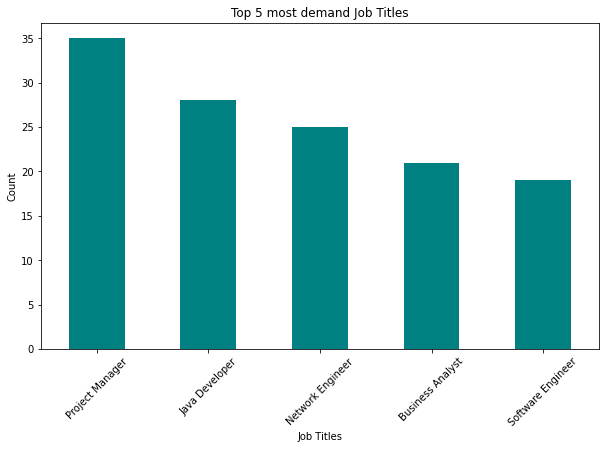

In [17]:

# Get the top 5 job titles and their counts
top_job_titles = df1['jobtitle'].value_counts()[:5]

# Plot the graph
plt.figure(figsize=(10, 6))
top_job_titles.plot(kind='bar', color='teal')
plt.title('Top 5 most demand Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Decision Tree Accuracy: 0.04678362573099415
KNN Accuracy: 0.02631578947368421


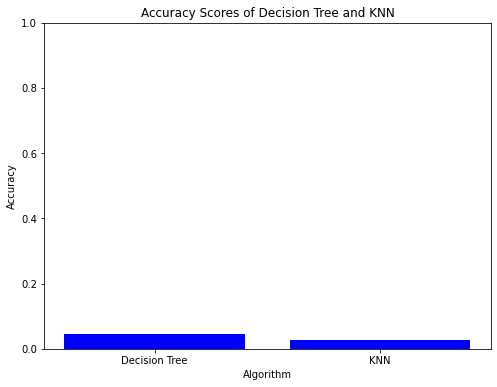

In [18]:
#APPLYING ALGORITHM OF DECISION TREE AND KNEIGHBOR

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df1 = pd.read_csv('C:/Users/CC/Documents/dice_com-job_us_sample.csv')
df1 = df1.dropna()

# Create a TF-IDF vectorizer and fit-transform the 'jobdescription' column
tdif = TfidfVectorizer(stop_words='english')
df1['jobdescription'] = df1['jobdescription'].fillna('')
tdif_matrix = tdif.fit_transform(df1['jobdescription'])

# Split the data into training and testing sets
X = tdif_matrix
y = df1['jobtitle']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the Decision Tree algorithm
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Apply the K-Nearest Neighbors algorithm
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)



# Plot the accuracy scores
labels = ['Decision Tree', 'KNN']
accuracy_scores = [accuracy_dt, accuracy_knn]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Decision Tree and KNN')
plt.ylim(0, 1)
plt.show()



1    1624
2    1191
0     602
Name: cluster_label, dtype: int64
                                           advertiserurl  \
15494  https://www.dice.com/jobs/detail/UI-developer-...   
388    https://www.dice.com/jobs/detail/JavaScript-De...   
16218  https://www.dice.com/jobs/detail/Sr.-Project-E...   
1753   https://www.dice.com/jobs/detail/Automated-QA-...   
15501  https://www.dice.com/jobs/detail/IT-Project-Ma...   

                         company  \
15494        IRIS Software, Inc.   
388                  CyberCoders   
16218                  Collabera   
1753                     Veredus   
15501  Crossfire Consulting Corp   

                                employmenttype_jobstatus  \
15494  Contract Corp-To-Corp, Contract Independent, C...   
388                       Full Time, Full-time, Employee   
16218          Contract W2, C2H W2, Part Time, 12 months   
1753                                         Contract W2   
15501  Contract Corp-To-Corp, Contract Independent, C...  

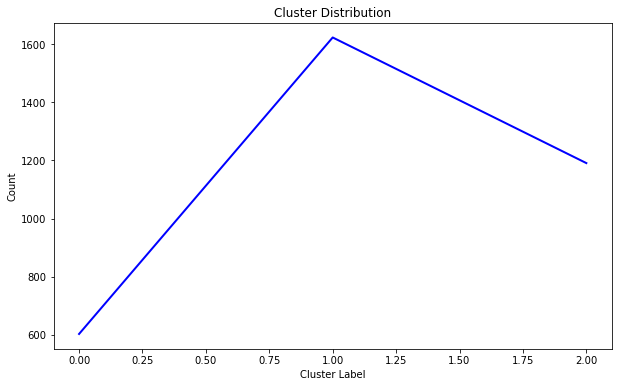

In [19]:

#CLUSTERING BY KMEANS
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters you want
kmeans.fit(tdif_matrix)
df1['cluster_label'] = kmeans.labels_
# Print the counts of each cluster label
print(df1['cluster_label'].value_counts())

# View a sample of the clustered data
print(df1.sample(5))
cluster_counts = df1['cluster_label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(cluster_counts.index, cluster_counts.values, color='blue', linewidth=2)
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()


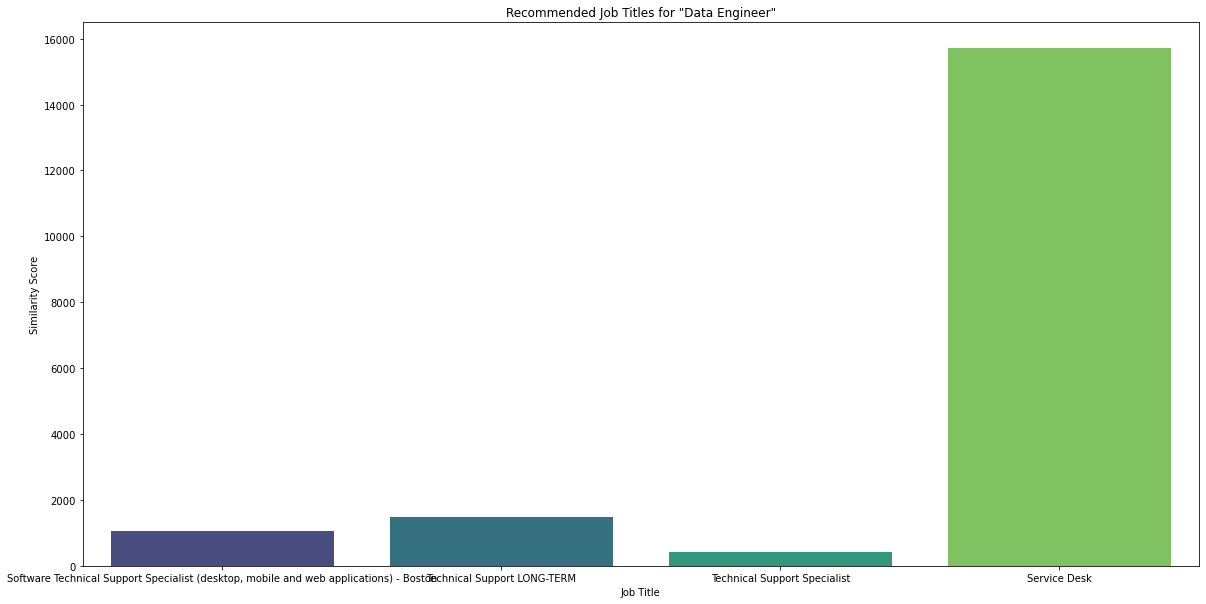

In [30]:

# Call the get_recommendations function to get the recommended job titles
recommended_jobs = get_recommendations("Data Engineer")

# Create a bar plot of the recommended job titles
plt.figure(figsize=(20, 10))
sns.barplot(x=recommended_jobs.values, y=recommended_jobs.index, palette='viridis')
plt.xlabel('Job Title')
plt.ylabel('Similarity Score')
plt.title('Recommended Job Titles for "Data Engineer"')
plt.show()